# This code is used to demonstrate the stages of generating a dataset with the random walk process. 
## Since the data is generated randomly, obtaining different results each time the application runs is expected. 

In [1]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\seda\Anaconda3\envs\openpose\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\seda\Anaconda3\envs\openpose\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\seda\Anaconda3\envs\openpose\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np

#Parameters Required for the Random Walk Process

# 1. column -clor
mean1 = 4
min_val1 = 0
max_val1 = 10
std_dev1 = 1

# 2. column -conductivity
mean2 = 700
min_val2 = 0
max_val2 = 2500
std_dev2 = 25

# 3. column -dissolvedoxygen
mean3 = 7
min_val3 = 0
max_val3 = 20
std_dev3 = 1.2

# 4. column -ph
mean4 = 7
min_val4 = 4
max_val4 = 10
std_dev4 = 1

# 5. column -pressure
mean5 = 5
min_val5 = 3
max_val5 = 6.5
std_dev5 = 1

# 6. column -turbidity
mean6 = 7
min_val6 = 0
max_val6 = 17
std_dev6 = 2

# 7. column -temperature
mean7 = 24
min_val7 = 0
max_val7 = 62
std_dev7 = 8


num_rows = 100000

# Selecting mean values as initial values
data = np.zeros((num_rows, 7))
data[0, 0] = mean1
data[0, 1] = mean2
data[0, 2] = mean3
data[0, 3] = mean4
data[0, 4] = mean5
data[0, 5] = mean6
data[0, 6] = mean7

# Creating a Random Walk Process and Assigning Random Values for Each Column
for i in range(1, num_rows):
    next_val1 = data[i-1, 0] + np.random.normal(loc=0, scale=std_dev1)
    # Limiting Minimum and Maximum Values
    next_val1 = min(max_val1, max(min_val1, next_val1))
    data[i, 0] = next_val1

    next_val2 = np.random.normal(loc=mean2, scale=std_dev2)
    # Limiting Minimum and Maximum Values
    next_val2 = min(max_val2, max(min_val2, next_val2))
    data[i, 1] = next_val2
    
    next_val3 = np.random.normal(loc=mean3, scale=std_dev3)
    # Limiting Minimum and Maximum Values
    next_val3 = min(max_val3, max(min_val3, next_val3))
    data[i, 2] = next_val3
    
    next_val4 = np.random.normal(loc=mean4, scale=std_dev4)
    # Limiting Minimum and Maximum Values
    next_val4 = min(max_val4, max(min_val4, next_val4))
    data[i, 3] = next_val4
    
    next_val5 = np.random.normal(loc=mean5, scale=std_dev5)
    # Limiting Minimum and Maximum Values
    next_val5 = min(max_val5, max(min_val5, next_val5))
    data[i, 4] = next_val5
    
    next_val6 = np.random.normal(loc=mean6, scale=std_dev6)
    # Limiting Minimum and Maximum Values
    next_val6 = min(max_val6, max(min_val6, next_val6))
    data[i, 5] = next_val6
    
    next_val7 = np.random.normal(loc=mean7, scale=std_dev7)
    # Limiting Minimum and Maximum Values
    next_val7 = min(max_val7, max(min_val7, next_val7))
    data[i, 6] = next_val7

# Writing the Generated Data to a File
with open('veriler2.csv', 'w') as f:
    f.write('clor,conductivity,dissolvedoxygen,pH,pressure,turbidity,temperature \n')
    for row in data:
        f.write(f'{row[0]},{row[1]},{row[2]},{row[3]},{row[4]},{row[5]},{row[6]} \n')


In [3]:
def random_walk(
    df, start_value, threshold, 
    step_size, min_value, max_value
):
    previous_value = start_value
    for index, row in df.iterrows():
        if previous_value < min_value:
            previous_value = min_value
        if previous_value > max_value:
            previous_value = max_value
        probability = random.random()
        if probability >= threshold:
            df.loc[index, 'value'] = previous_value + step_size
        else:
            df.loc[index, 'value'] = previous_value - step_size
        previous_value = df.loc[index, 'value']
    return df


In [4]:
import random
# load the dataset
dataset_path = 'veriler2.csv'
random_data = pd.read_csv(dataset_path)

In [5]:
random_data.head()

,clor,conductivity,dissolvedoxygen,pH,pressure,turbidity,temperature
0,4.000000,700.000000,7.000000,7.000000,5.000000,7.000000,24.000000
1,1.654253,679.126404,8.136074,6.490275,6.222995,4.428328,13.678369
2,0.302707,703.829151,7.840876,6.132025,4.517783,4.646817,35.963685
3,0.476422,714.187179,5.947635,8.508051,4.902881,9.270514,33.430841
4,0.681653,721.853008,7.761405,8.148056,4.991540,2.122656,7.684562


In [20]:
# In this section, the generated data for each column has been transformed into a time series using the random_walk function. 
# The step_size represents the magnitude of each step forward or backward.

time_series_col1 = random_walk(random_data[['clor']], start_value=mean1, threshold=0.5, 
                               step_size=0.0261, min_value=min_val1, max_value=max_val1)

time_series_col2 = random_walk(random_data[['conductivity']], start_value=mean2, threshold=0.5, 
                               step_size=12.083, min_value=min_val2, max_value=max_val2)

time_series_col3 = random_walk(random_data[['dissolvedoxygen']], start_value=mean3, threshold=0.5, 
                               step_size=0.212, min_value=min_val3, max_value=max_val3)

time_series_col4 = random_walk(random_data[['pH']], start_value=mean4, threshold=0.5, 
                               step_size=0.0427, min_value=min_val4, max_value=max_val4)

time_series_col5 = random_walk(random_data[['pressure']], start_value=mean5, threshold=0.5, 
                               step_size=0.029, min_value=min_val5, max_value=max_val5)

time_series_col6 = random_walk(random_data[['turbidity']], start_value=mean6, threshold=0.5, 
                               step_size=0.0839, min_value=min_val6, max_value=max_val6)

time_series_col7 = random_walk(random_data[['temperature']], start_value=mean7, threshold=0.5, 
                               step_size=0.753, min_value=min_val7, max_value=max_val7)



C:\Users\seda\AppData\Local\Temp\ipykernel_15160\828630772.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'value'] = previous_value + step_size
C:\Users\seda\AppData\Local\Temp\ipykernel_15160\828630772.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'value'] = previous_value + step_size
C:\Users\seda\AppData\Local\Temp\ipykernel_15160\828630772.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

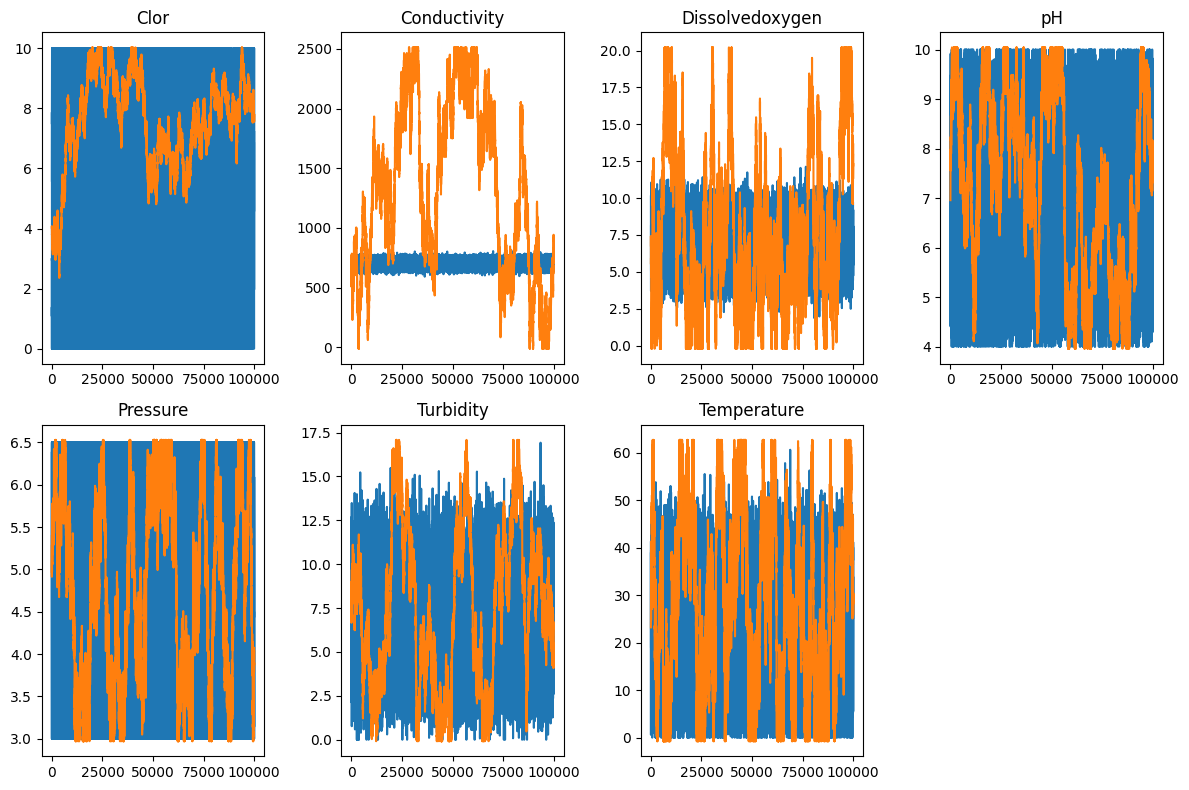

In [23]:

plt.figure(figsize=(12, 8))


# First Column
plt.subplot(2, 4, 1)
plt.plot(time_series_col1)
plt.title('Clor')

plt.subplot(2, 4, 2)
plt.plot(time_series_col2)
plt.title('Conductivity')

plt.subplot(2, 4, 3)
plt.plot(time_series_col3)
plt.title('Dissolvedoxygen')

plt.subplot(2, 4, 4)
plt.plot(time_series_col4)
plt.title('pH')

# Second Column
plt.subplot(2, 4, 5)
plt.plot(time_series_col5)
plt.title('Pressure')

plt.subplot(2, 4, 6)
plt.plot(time_series_col6)
plt.title('Turbidity')

plt.subplot(2, 4, 7)
plt.plot(time_series_col7)
plt.title('Temperature')

plt.tight_layout()
plt.show()

## orange -> refers to the random data generated in the first stage.
## blue -> refers to time series data created using the random walk function.

In [80]:
df2 = pd.concat([time_series_col1, time_series_col2, time_series_col3, time_series_col4, 
                time_series_col5, time_series_col6, time_series_col7], axis=1)



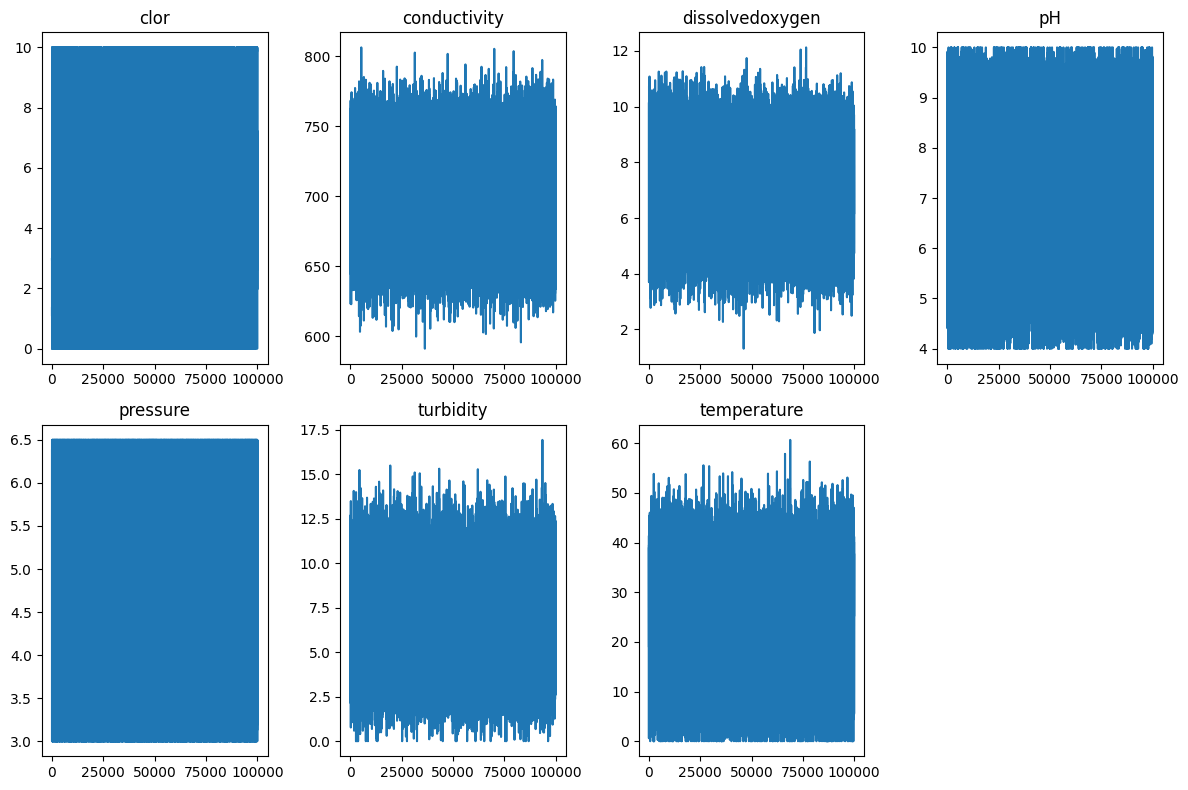

In [25]:
# Her bir sütun için değişim grafiği çizme
plt.figure(figsize=(12, 8))

for i, column in enumerate(df2.columns, 1):
    plt.subplot(2, 4, i)
    plt.plot(df2.index, df2[column])
    plt.title(column)

# Grafikleri göster
plt.tight_layout()
plt.show()

In [81]:
df2.to_csv('dataset1.csv') 

In [82]:
df2.to_excel('dataset1.xlsx') 